In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import math


In [27]:
url = 'https://raw.githubusercontent.com/Marian2057/TP1_Aprendizaje_Estad-stico/main/Buenos_Aires_AIRBNB.csv'
base = pd.read_csv(url)
base.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,7270,¡¡Great Loft in Palermo Hollywood!!,18822,Toni,Palermo,-34.58241,-58.43382,Entire home/apt,2033,20,14,30-04-2018,0.15,1,363
1,11508,Amazing Luxurious Apt-Palermo Soho,42762,Candela,Palermo,-34.58225,-58.42460,Entire home/apt,3588,2,25,13-08-2019,0.28,1,281
2,12463,Room in Recoleta - awesome location,48799,Matt,Recoleta,-34.59761,-58.39468,Private room,1435,1,20,11-12-2017,0.17,1,365
3,13095,Standard Room at Palermo Viejo B&B,50994,Ariel,Palermo,-34.59382,-58.42994,Private room,2691,1,1,18-12-2018,0.09,7,360
4,13096,Standard Room in Palermo Viejo B&B,50994,Ariel,Palermo,-34.59398,-58.42853,Private room,2691,1,0,NaN,NaN,7,360


¿Qué columnas tiene?

In [28]:
base.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

¿Qué tipo de columnas son?

Tenemos 10 variables numericas (3 son flotantes y 7 enteras) y 5 categoricas

In [29]:
print("Variables del dataset \n")
base.info()

Variables del dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22877 entries, 0 to 22876
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              22877 non-null  int64  
 1   name                            22867 non-null  object 
 2   host_id                         22877 non-null  int64  
 3   host_name                       22854 non-null  object 
 4   neighbourhood                   22877 non-null  object 
 5   latitude                        22877 non-null  float64
 6   longitude                       22877 non-null  float64
 7   room_type                       22877 non-null  object 
 8   price                           22877 non-null  int64  
 9   minimum_nights                  22877 non-null  int64  
 10  number_of_reviews               22877 non-null  int64  
 11  last_review                     16432 non-null  object 
 12  reviews_

Análisis y aplicación de Medidas de Tendencia Central

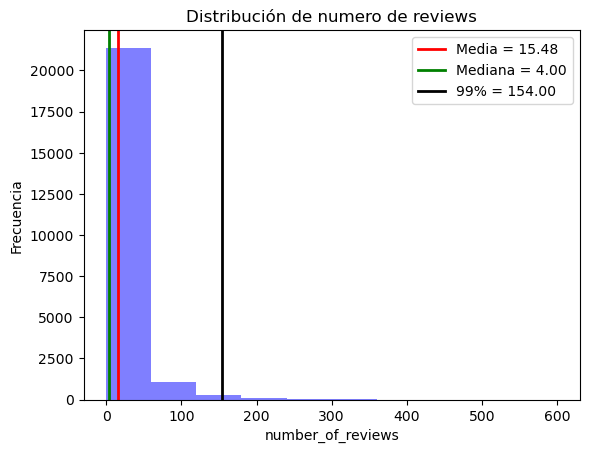

In [30]:
media_number_of_reviews = np.mean(base["number_of_reviews"])
mediana_number_of_reviews = np.median(base["number_of_reviews"])
min_number_of_reviews = np.min(base["number_of_reviews"])
max_number_of_reviews = np.max(base["number_of_reviews"])
rango_number_of_reviews = max_number_of_reviews - min_number_of_reviews
std_number_of_reviews = np.std(base["number_of_reviews"])
p99_number_of_reviews = np.percentile(base["number_of_reviews"], 99)

# Armamos el gráfico
plt.hist(base["number_of_reviews"], color='blue', alpha=0.5)
plt.xlabel("number_of_reviews")
plt.ylabel("Frecuencia")
plt.title("Distribución de numero de reviews")
plt.axvline(media_number_of_reviews, color='red', linewidth=2, label=f'Media = {media_number_of_reviews:.2f}')
plt.axvline(mediana_number_of_reviews, color='green', linewidth=2, label=f'Mediana = {mediana_number_of_reviews:.2f}')
plt.axvline(p99_number_of_reviews, color='black', linewidth=2, label=f'99% = {p99_number_of_reviews:.2f}')

plt.legend()
plt.show()

In [31]:
print(f"La cantidad mínima de numeros de reviews es: {min_number_of_reviews}")
print(f"La cantidad máxima de numeros de reviews es: {max_number_of_reviews}")
print(f"El rango de numeros de reviews es: {rango_number_of_reviews}")
print(f"El error standard de numeros de reviews es: {std_number_of_reviews:.4f}")

La cantidad mínima de numeros de reviews es: 0
La cantidad máxima de numeros de reviews es: 600
El rango de numeros de reviews es: 600
El error standard de numeros de reviews es: 31.2679


In [32]:
p25_number_of_reviews = np.percentile(base["number_of_reviews"], 25)
p50_number_of_reviews = np.percentile(base["number_of_reviews"], 50)
p60_number_of_reviews = np.percentile(base["number_of_reviews"], 60)
p75_number_of_reviews = np.percentile(base["number_of_reviews"], 75)
p95_number_of_reviews = np.percentile(base["number_of_reviews"], 95)
print(f"El percentil 25 es: {p25_number_of_reviews}; \nEl percentil 50 es: {p50_number_of_reviews}; \nEl percentil 60 es: {p60_number_of_reviews}; \nEl percentil 75 es: {p75_number_of_reviews}; \nEl percentil 95 es: {p95_number_of_reviews}.")

El percentil 25 es: 0.0; 
El percentil 50 es: 4.0; 
El percentil 60 es: 7.0; 
El percentil 75 es: 16.0; 
El percentil 95 es: 72.0.


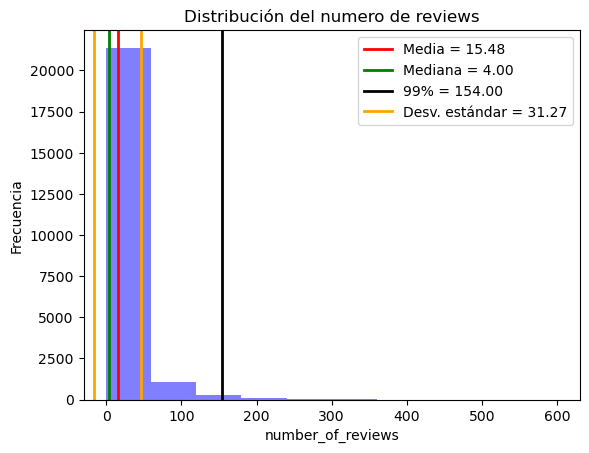

Desviación estándar: 31.26788135938263
Varianza: 977.6804047044279
Rango intercuartil: 16.0
Coeficiente de variación: 201.95009707925274


In [33]:
# Calculamos las medidas de dispersión
std_number_of_reviews = np.std(base["number_of_reviews"])
var_number_of_reviews = np.var(base["number_of_reviews"])
iqr_number_of_reviews = np.subtract(np.percentile(base["number_of_reviews"], 75), np.percentile(base["number_of_reviews"], 25))
cv_number_of_reviews = (std_number_of_reviews / media_number_of_reviews) * 100

# Armamos el gráfico
plt.hist(base["number_of_reviews"], color='blue', alpha=0.5)
plt.xlabel("number_of_reviews")
plt.ylabel("Frecuencia")
plt.title("Distribución del numero de reviews")
plt.axvline(media_number_of_reviews, color='red', linewidth=2, label=f'Media = {media_number_of_reviews:.2f}')
plt.axvline(mediana_number_of_reviews, color='green', linewidth=2, label=f'Mediana = {mediana_number_of_reviews:.2f}')
plt.axvline(p99_number_of_reviews, color='black', linewidth=2, label=f'99% = {p99_number_of_reviews:.2f}')
plt.axvline(media_number_of_reviews + std_number_of_reviews, color='orange', linewidth=2, label=f'Desv. estándar = {std_number_of_reviews:.2f}')
plt.axvline(media_number_of_reviews - std_number_of_reviews, color='orange', linewidth=2)
plt.legend()
plt.show()

# Imprimimos las medidas de dispersión
print("Desviación estándar:", std_number_of_reviews)
print("Varianza:", var_number_of_reviews)
print("Rango intercuartil:", iqr_number_of_reviews)
print("Coeficiente de variación:", cv_number_of_reviews)

In [34]:
# El análisis de covarianza (ANCOVA) se utiliza para examinar si existe una relación entre una variable dependiente y una 
# variable independiente, mientras se controlan los efectos de otras variables independientes (también conocidas como 
# covariables). La covarianza es una medida de cómo varían conjuntamente dos variables. Si las dos variables tienden a variar 
# juntas (es decir, cuando una variable es alta, la otra también lo es), entonces la covarianza será positiva. Si las dos 
# variables tienden a variar en direcciones opuestas (es decir, cuando una variable es alta, la otra es baja), entonces la 
# covarianza será negativa.

# Para realizar un análisis de covarianza en Python, se puede utilizar la función scipy.stats.linregress() de la biblioteca 
# SciPy. Esta función calcula una regresión lineal simple y devuelve varios valores, incluyendo la covarianza entre las dos 
# variables.

# Supongamos que tenemos un conjunto de datos que contiene dos variables, una variable independiente llamada "X" y una variable 
# dependiente llamada "Y". El siguiente código muestra cómo se puede calcular la covarianza entre las dos variables utilizando 
# scipy.stats.linregress():


# Extraemos los datos de las columnas "Edad" y "superficie"
number_of_reviews = base["number_of_reviews"]
minimum_nights = base["minimum_nights"]

# Calculamos la covarianza entre ambas variables
cov = np.cov(number_of_reviews, minimum_nights)

# Imprimimos la covarianza
print("Covarianza entre numero de reviews y minimo de noches:")
print(cov[0, 1])

Covarianza entre numero de reviews y minimo de noches:
-40.42518648101019


In [35]:
corr = np.corrcoef(number_of_reviews, minimum_nights)[0, 1]
print("Coeficiente de correlación entre número de reviews y mínimo de noches:")
print(corr)

Coeficiente de correlación entre número de reviews y mínimo de noches:
-0.06009516719196071


Dividir los datos en conjuntos de entrenamiento y prueba:

Creación y entrenamiento del modelo de predicción de precios:

Entrenar y evaluar el modelo de predicción de precio: